# Assessment 1
    Columns are:
    lcavol - log(cancer volume)
    lweight - log(weight)
    age - age
    lbph - log(benign prostatic hyperplasia amount)
    svi - seminal vesicle invasion
    lcp - log(capsular penetration)
    gleason - grade of cancer
    pgg45 - percentage Gleason scores 4 or 5
    lpsa - outcome - log prostate specific antigen
    From Stamey et al (1989)

In [42]:
nb_path = '/Users/martinoleary/Dropbox/Data_Analytics/Sem_4/Python/Notebooks/rodji/'
gl_path = 'Data/'

In [44]:
cd $nb_path

/Users/martinoleary/Dropbox/Data_Analytics/Sem_4/Python/Notebooks/rodji


In [45]:
import numpy as np
import pandas as pd

# Import prostate data set
prostate = pd.read_csv(gl_path + 'prostate.csv')

### Q1 This data set has __ rows and __ columns

In [3]:
print 'Data has %d rows and %d columns' % np.shape(prostate)

Data has 97 rows and 10 columns


### Q2 What's the age of the person in the third row?

In [4]:
# Look at first 3 records
print 'Age of person in 3rd row is %d ' %prostate.ix[2,2] # Use IX to cut DF
# Q2 What's the age of the person in the third row? 74 (other answers 50,58,62)

Age of person in 3rd row is 74 


### Q3 How many men have a Gleason score of 6? 35 (others 56, 5, 1)

In [5]:
from tabulate import tabulate
# Calculate a table of the different cuts
print tabulate(pd.DataFrame(prostate.gleason.value_counts()),headers=["Gleason Score","Frequency"])

  Gleason Score    Frequency
---------------  -----------
              7           56
              6           35
              9            5
              8            1


### Q4 How many men are in the group (50,60)? 17

In [6]:
# Create a new variable which is age grouped into 40-50, 50-60, 60-70, 70-80
# The below code creates a new variable called called age_groups which assigns each to a decadal category
prostate['age_groups'] = pd.cut(prostate.age,(40,50,60,70,80))
prostate.age_groups.value_counts()
print 'Number of men in group 50-60 : %d' % prostate.age_groups.value_counts()[1]

Number of men in group 50-60 : 17


### Q5 The mean log cancer volume __ with age (increases)

In [7]:
# Now look at mean size by age group
pd.pivot_table(prostate, 'lcavol', index='age_groups')
# Use a pivot table to calculate the mean of 'lcavol' by the different age groups
# Fill in the blank with either increases or decreases
print "Increases"

Increases


# Assessment 2

In [8]:
# -*- coding: utf-8 -*-
# Write some functions for DNA strings

# Simulate a load of strings of AGCT of a set length
import numpy.random as npr
npr.seed(123)
my_length = 100
bp = ['A','C','G','T']
DNA = ''.join(npr.choice(bp,size=my_length)) 

### Q1 The below function takes a DNA string and works out the number of times a certain letter appears. 
Fill in the blanks to get the code to work for the below function call. (hint: the answer should be 25)

In [9]:
def count_val(dna,val):
    count = 0
    for i in dna:
        if i == val:
            count += 1
    return count
count_val(DNA,'A')
# Missing values above are 
# for i in [x]:
# and
# count += [y]


25

### Q2 The below function extends the previous one to allow for sequences of length two. However, there seems to be a mistake in the 4th line of the function. What should it read? (hint: the answer should be 7)

In [10]:
def count_val_2(dna,seq):
    count = 0
    for i in range(len(dna)):
	# Mistake is 
	#if ''.join(dna[i:(i+1)]) == seq:
        if ''.join(dna[i:(i+2)]) == seq:
            count += 1
    return count

count_val_2(DNA,'AA')

7

### Q3 The below function produces counts for sequences of undetermined length. Fill in the blanks so that the below function works (hint: the answer should be 1)
    def count_val_3(dna,seq):
        count = 0
        for i in range(len(dna)):
            if ''.join([x]) == seq:
            count += 1
        return [y]
    count_val_3(DNA,'AAAA')

In [11]:
# Should be 
def count_val_3(dna,seq):
    count = 0
    for i in range(len(dna)):
        if ''.join(dna[i:(i+len(seq))]) == seq:
            count += 1
    return count

# Alternative version created by some students which is also correct
def count_val_3a(dna,seq):
    count = 0
    for i in range(len(dna)):
        if ''.join(dna[i:len(seq)+i]) == seq:
            count += 1
    return count

count_val_3(DNA,'AAAA')
count_val_3a(DNA,'AAAA')

1

### Q4 Re-create the data set using the code given in the rubric but now create a DNA string of length 10,000 (use the same seed 123). Write a new function count_val_4 which records all the positions where a sequence occurs. What values do you get for the command below?

In [12]:
npr.seed(123)
my_length = 10000
DNA = ''.join(npr.choice(bp,size=my_length))

def count_val_4(dna,seq):
    positions = []
    for i in range(len(dna)):
        if ''.join(dna[i:(i+len(seq))]) == seq:
            positions.append(i)
    return positions

count_val_4(DNA,'ACAGA') # [172, 2407, 3600, 6561, 7003, 7096]

[172, 2407, 3600, 6561, 7003, 7096]

### Q5 Write a function count_val_5 which takes 2 DNA strings of the same length and returns the number of times a set sequence occurs in both at the same location
### Q5 How many times does the sequence ACA occur in both strings in the same place?

In [13]:
def count_val_5(dna_1,dna_2,seq):
    count = 0
    for i in range(len(dna_1)):
        if (''.join(dna_1[i:(i+len(seq))]) == seq) & (''.join(dna_2[i:(i+len(seq))]) == seq):
            count = count+1
    print count

# Use your function on the following 2 DNA strings
npr.seed(123)
my_length = 100000
DNA_1 = ''.join(npr.choice(bp,size=my_length))
DNA_2 = ''.join(npr.choice(bp,size=my_length))
# Q5 How many times does the sequence ACA occur in both strings in the same place?
count_val_5(DNA_1,DNA_2,'ACA') # 22

22


# Assessment 3

In [14]:
# Assessed exercises 3 - trapezoidal integration

# A simple way of computing the integral of a function is to use the trapezoidal rule:
# int_a^b f(x) dx \approx sum_{i=1}^n 0.5*h*(f(x_i)+f*x_{i+1}))
# where h = (b-a)/n and x_i = a + (i-1)*h

# Below is a version implemented for n=1, so that the RHS of the above formula becomes 0.5*(b-a)*(f(b)+f(a))
def trap_int(f,a,b):
    return 0.5*(b-a)*(f(b)+f(a))

# Here it is being used on a simple function 
import numpy as np
answer = trap_int(np.exp,1,2)

### Q1 Use the function above to approximate the following integrals to 3 d.p.
    a int_0.1^0.5 exp(x) dx
    b int_0^(pi/2) sin(x) dx
    c int_2^4 x^{1/2} - cos(x) dx (hint: create your own function which computes this first)

In [15]:
answer_1a = trap_int(np.exp,0.1,0.5) # 0.551
answer_1b = trap_int(np.sin,0,np.pi/2) # 0.785
def my_f(x):
    return np.sqrt(x) - np.cos(x)
answer_1c = trap_int(my_f,2,4) # 4.484

### Q2 Write a function trap_int_2 which does not create any arrays but uses a for loop to implement the trap int formula for general n

In [16]:
def trap_int_2(f,a,b,n):
    h = (b-a)/n
    my_sum = 0
    for i in np.arange(n):
        x_i = a + i*h
        x_ip1 = a + (i+1)*h
        my_sum += f(x_i) + f(x_ip1)
    return 0.5*h*my_sum

### Q3 Evaluate the integrals for question 1 with your new function for n=300 (again to 3dp):
    a int_0.1^0.5 exp(x) dx
    b int_0^(pi/2) sin(x) dx
    c int_2^4 x^{1/2} - cos(x) dx (hint: be careful that h does not become an integer here)

In [17]:
answer_3a = trap_int_2(np.exp,0.1,0.5,300) # 0.544
answer_3b = trap_int_2(np.sin,0,np.pi/2,300) # 1.000
answer_3c = trap_int_2(my_f,2.0,4.0,300.0) # 5.114

### Q4 Re-write your function as trap_int_3 using arrays to avoid the for loop. Check that you get the same answers for n=300 as above. You might also like to compare timings using %timeit

In [18]:
def trap_int_3(f,a,b,n):
    h = (b-a)/n
    x = a + np.arange(n+1)*h
    f_x = f(x)
    f_x_2 = f_x.copy()
    f_x_2[0] = 0
    f_x_2[n] = 0
    sum_f_x = np.sum(f_x +f_x_2)
    return 0.5*h*sum_f_x

answer_4a = trap_int_3(np.exp,0.1,0.5,300) # 0.544
answer_4b = trap_int_3(np.sin,0,np.pi/2,300) # 1.000
answer_4c = trap_int_3(my_f,2.0,4.0,300.0) # 5.114

%timeit trap_int_3(np.exp,0.1,0.5,300) # Way faster
%timeit trap_int_2(np.exp,0.1,0.5,300)



/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


10000 loops, best of 3: 22.6 µs per loop
100 loops, best of 3: 2.54 ms per loop


### Q5 For the integral int_0.1^0.5 exp(x) we know the true answer as it can be calculated algebraically. 
Create an array which measure the absolute error for n=1 to 100. At what point does that absolute error become <10^{-5} (hint: use np.where)

In [19]:
true_val = np.exp(0.5)-np.exp(0.1)
abs_error = np.empty(100)
for i in range(100):
    abs_error[i] = np.fabs(true_val-trap_int_3(np.exp,0.1,0.5,i+1))
# Answer n = 27

In [20]:
# Assessment 4

In [21]:
# Lecture 4 assessed exercises
# These are on linear regression

# Import numpy
import numpy as np
import numpy.random as npr
import numpy.linalg as npl

# Simulate some data as in the end of lecture 4 - but this time of higher dimension
n = 1000
npr.seed(123)
x_1 = npr.uniform(0,10,n)
x_2 = npr.uniform(0,10,n)
x_3 = npr.uniform(0,10,n)
x_4 = npr.uniform(0,10,n)
y = 3 + 2*x_1 - x_2 + 0.5*x_3 - 0.1*x_4 + npr.normal(0,1,n)

# Create a design matrix X with 5 columns, the first of which is all 1 the subsequent ones are x_1, x_2, etc
X = np.array(([1]*n,x_1,x_2,x_3,x_4)).T

### Q1 Use the inv function and the standard equation \beta = (X^T X)^{-1} X^T y to get estimates of the slope and intercept parameters
What values do you get for the intercept and coefficient of x_1 to 3d.p. (hint: remember the values you used to simulate these data from - they provide a useful check)

In [22]:
beta = (npl.inv(X.T.dot(X))).dot(X.T.dot(y))
# 2.951, 2.009

### Q2 Use the solve function instead to get another estimate of beta

In [23]:
beta_2 = npl.solve(X.T.dot(X),X.T.dot(y))
# Confirm you get the same values as above. Using %timeit roughly how much faster is the second version compared to the first
%timeit (npl.inv(X.T.dot(X))).dot(X.T.dot(y))
%timeit np.dot(npl.inv(np.dot(X.T,X)),X.T.dot(y)) # Alternative version
%timeit npl.solve(X.T.dot(X),X.T.dot(y))
# Note if you want to specify the number of iterations (not usually required)
#%timeit -n 10000 (npl.inv(X.T.dot(X))).dot(X.T.dot(y))
# 3micro(mu)s Correct, 3 minutes, 3s, 3milliseconds, 
# Tested on Mac OS X (last three versions), Ubuntu (last two versions), Cent OS 7, Windows (7, 8, and 10)

The slowest run took 9.56 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 39.3 µs per loop
10000 loops, best of 3: 39.3 µs per loop
The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 40 µs per loop


### Q3 Study the code below and use it to simulate a linear regression model with p=100 explanatory variables

In [24]:
npr.seed(123)
p = 100
x = npr.randn(n,p)
X = np.zeros((n,p+1))
X[:,0] = [1]*n
X[:,1:(p+1)] = x
beta = np.array([1,4,3,-2] + [0]*(p-3))
y = X.dot(beta) + npr.normal(0,1,n)
# Use the two different versions of estimating beta here. How well do they do? How much quicker is the solve version now?
%timeit (npl.inv(X.T.dot(X))).dot(X.T.dot(y))
%timeit npl.solve(X.T.dot(X),X.T.dot(y))
# Which of the following happens as you increase p? (tick two)
# As p gets larger the solve version starts to become much faster than the inverse version
# When p starts to get bigger than n the estimates of beta start to get much further away from the true values
# Others
# Both the solve version and the inverse version get quicker
# The matrix X^T X gets smaller

The slowest run took 7.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 570 µs per loop
1000 loops, best of 3: 488 µs per loop


### If you set the seed at value 123 (see Lecture 2 assessed exercises), what values do you get for the mean and standard deviation of the intercept (i.e. the first value of beta) and the coefficient of x_1 (i.e. the second values of beta)?

In [25]:
# Q4 The code below shows how to re-sample (also known as bootstrapping) the X and y values:
index = npr.choice(range(n),size=n,replace=True)
y_curr = y[index]
X_curr = X[index,:]
# With p=100 again, use the code above to create 1000  bootstrap samples of the Xs and ys from their current values. 
# By repeatedly calculating your estimate of beta for these bootstrap samples, create bootstrap uncertainty estimates of the betas
n_samp = 1000
npr.seed(123)
beta_bootstrap = np.zeros((n_samp,p+1))
for i in range(n_samp):
    index = npr.choice(range(n),size=n,replace=True)
    y_curr = y[index]
    X_curr = X[index,:]
    beta_bootstrap[i,:] = npl.solve(X_curr.T.dot(X_curr),X_curr.T.dot(y_curr))


# (hint: use np.mean and mp.std)
np.mean(beta_bootstrap,axis=0)[:2]
# Depending on where you set the seed you might get:
# 0.910, 4.078 or 
# 0.959, 3.940/3.941 - (again the latter depends on where you set the seed)
np.std(beta_bootstrap,axis=0)[:2]
# 0.034, 0.035
# 0.033, 0.034

array([ 0.0330596 ,  0.03410173])

### Q5 An alternative to the standard linear regression model we're fitting above is something called ridge regression. For ridge regression the estimate of beta is changed to beta = (X^T X + \lambda I)^{-1} X^T y for some shrinkage parameter lambda.
    Using the data you created in Q3, find out which value of lambda produces the residual sum of squares (i.e. smallest (y-Xbeta)^Y (y-Xbeta)), 1, 10, 100 or 1000
    Big lambda should provide you with small betas

In [26]:
lam_1 = 1*np.eye(p+1)
beta_1 = npl.solve(X.T.dot(X)+lam_1,X.T.dot(y))
RSS_1 = (y - X.dot(beta_1)).T.dot(y-X.dot(beta_1))
# 896.11898572747259
lam_2 = 10*np.eye(p+1)
beta_2 = npl.solve(X.T.dot(X)+lam_2,X.T.dot(y))
RSS_2 = (y - X.dot(beta_2)).T.dot(y-X.dot(beta_2))
# 899.67135999007769
lam_3 = 100*np.eye(p+1)
beta_3 = npl.solve(X.T.dot(X)+lam_3,X.T.dot(y))
RSS_3 = (y - X.dot(beta_3)).T.dot(y-X.dot(beta_3))
# 1182.9953553239393
lam_4 = 1000*np.eye(p+1)
beta_4 = npl.solve(X.T.dot(X)+lam_4,X.T.dot(y))
RSS_4 = (y - X.dot(beta_4)).T.dot(y-X.dot(beta_4))
# 8233.6904473079103

# Which values of lambda gives the smallest RSS?
# lambda = 1

# Assessment 5 

In [39]:
# Assessed exercises for week 5 - back to the Diamonds data

#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
#import numpy.random as npr

# First go back and load in the Diamonds data
diamonds = pd.read_csv(gl_path + 'Diamonds.csv')

# What things have we learnt this week? Series and DataFrames: using indices, 
# indexing and slicing; boolean indexing, simple functions on series and data frames
# Pass-by-reference, Numpy and DataFrames, The in operator

# Rubric: For this week's assessed exercises we will go back and use the Diamonds data
# we first used in lecture 1. Please first go back and load it in.

### Q1 How many diamonds have a cut of 'Ideal'?

In [28]:
print 'Number of Diamonds with Ideal cut is %d'%sum(diamonds.cut=='Ideal')
# 21551

Number of Diamonds with Ideal cut is 21551


### Q2 How many diamonds have a cut of 'Ideal' and a price of above $9000

In [29]:
print 'Number of Diamonds with Ideal cut and price above 9000 is %d'%sum((diamonds.cut=='Ideal') & (diamonds.price>9000))
# 2190

Number of Diamonds with Ideal cut and price above 9000 is 2190


### Q3 Create a new data set diamonds_2 which contains just the first 1000 rows of the DataFrame.
    Create a numpy array called dist of size 1000 by 1000. Fill each element in the array with 
    a distance between each observation, calculated as:
    distance between observation i and j  = ((carat_i - carat_j)/0.5)^2 + ((table_i - table_j)/10)^2
    Which pair of diamonds corresponds to the biggest distance? (Give the row indices for the two diamonds)
    (Hint: when looking for the location of the maximum use np.where( dist == dist.max(). Make sure, for later questions, that your distance matrix is symmetric )

In [30]:
diamonds_2 = diamonds[:1000]
N = len(diamonds_2)
dist = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        print i
        dist[i,j] = pow((diamonds_2.carat[i]-diamonds_2.carat[j])/0.5,2) + pow((diamonds_2.table[i]-diamonds_2.table[j])/10,2)
        dist[j,i] = dist[i,j]
        
np.where( dist == dist.max() )
# Indices 51 and 659
#dist[51,659]
diamonds_2.ix[[51,659],:] # printing will slow browser

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


ValueError: I/O operation on closed file

### Q4 Now find the smallest of the distances that is non-zero. Which four pairs of diamonds does this correspond to (again give the row indices)?

In [ ]:
dist[dist==0] = 10000
np.where( dist == dist.min())
# 173,781; 303,699; 492,781; 689,699
diamonds_2.ix[[173,781],:]
diamonds_2.ix[[303,699],:]
diamonds_2.ix[[492,781],:]
diamonds_2.ix[[689,699],:]
# How many pairs attain this minimum distance?
# 4

### Q5 The dissimilarity score for each diamond is the sum of all the distances in each row of the distance matrix. Create the dis-similarity score as a sequence and add it as an extra column to the data set with a suitable column index. 
(Hint: remember to re-set any changes you might have made to dist in the previous question) 
(Use np.sum with suitable arguments to get the row sums of dist)

In [ ]:
dist[dist==10000] = 0
dissim = np.sum(dist,axis=0)
diamonds_2['dissimilarity'] = dissim
# Which is the diamond which is most dis-similar? (Give the index number)
np.where(dissim==dissim.max())
diamonds_2.ix[314,:]

### Assessment 6 

Assessed exercises 6 - k nearest neighbours on the TunedIT data set



This week we will study the method of k nearest neighbours appled to a music classification data set
These data come from the TunedIT website - http://tunedit.org/challenge/music-retrieval/genres
Each row corresponds to a different sample of music from a certain genre
The original challenge was to classify the different genres (the original prize for this was hard cash!) 
however we will just focus on a sample of the data (~4000 samples) which is either rock or not
There are 191 characteristics (go back to the website if you want to read about these)
The general tasks of this exercise are to:
 - Load the data set
 - Standardise all the columns
 - Divide the data set up into a training and test set
 - Write a function which runs k nearest neighbours (kNN) on the data set. (Don't worry you don't need to know anything about kNN)
 - Check which value of k produces the smallest misclassification rate on the training set
 - Predict on the test set and see how it does

Side note: the scikit-learn package covers many of the machine learning/data mining algorithms in Python including kNN

### Q1 Load in the data using the pandas read_csv function. The last variable 'RockOrNot' determines whether the music genre for that sample is rock or not

What percentage of the songs in this data set are rock songs (to 1 d.p.)? # (Hint: if you're getting weird integer percentages put a . at the end of the number, e.g. 1./3. )

In [32]:
pwd

u'/Users/martinoleary/Dropbox/Data_Analytics/Sem_4/Python/Notebooks'

In [46]:
# Import packages
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import numpy.random as npr
music = pd.read_csv(gl_path + 'tunedit_genres.csv')
music.RockOrNot.value_counts(normalize=True)
# 48.8%

0    0.511628
1    0.488372
Name: RockOrNot, dtype: float64

### Q2 The below code separates out the data set into two parts. The first part, a DataFrame called X, should contain just the covariate information (i.e. the first 191 columns) standardised to have mean 0 and standard deviation 1. The second part, called y, should contain just the RockOrNot variable.

In [47]:
X = (music.drop('RockOrNot',axis=1) - music.drop('RockOrNot',axis=1).mean())/music.drop('RockOrNot',axis=1).std()
y = music.RockOrNot
# Use corrwith and np.where to find which variable has the biggest correlation with y
cors = X.corrwith(y)
np.where(cors==max(cors))
cors[100:103] # PAR_SFM_M - correlation is 0.596

PAR_SFM24   -0.208352
PAR_SFM_M    0.596287
PAR_SFMV1   -0.219418
dtype: float64

### Q3 Use the following code to divide the data set up into a training and test set of size 2999 and 1000 respectively 
There are lots of ways to do this, but we'll generate a random permuation of the
range 0 to 3998 and then pick off the first 2999 for the training set

In [48]:
npr.seed(123)
train_select = npr.permutation(range(3999))
X_train = X.ix[train_select[:2999],:].reset_index(drop=True)
X_test = X.ix[train_select[2999:],:].reset_index(drop=True)
y_train = y[train_select[:2999]].reset_index().RockOrNot
y_test = y[train_select[2999:]].reset_index().RockOrNot
# Note that reset_index here is used so that we can access the first row of X_train with X_train.ix[0,:] for example

# Unless we have been unlucky, the percentage of rock songs in the training/test 
# set will be close the percentage in the entire data set. What is the percentage of rock songs in the test set (to 1 d.p.)? 
y_test.value_counts(normalize=True) # 47.1% 
y_train.value_counts(normalize=True) # 49.4%
# Did ok - slightly higher percentage in test set?

0    0.505835
1    0.494165
Name: RockOrNot, dtype: float64

### Q4 Now we're going to run kNN on the data sets. kNN works by the following algorithm:
    1) Choose a value of k (usually odd)
    2) To classify a new observation z, find which are its k closest neightbours and take the majority vote
We're going to use standard Euclidean distance to find the distance between obs, defined as sqrt( (xi - xj)^T (xi-xj) )
A useful short cut for this is the scipy functions pdist and squareform
Below I've written a skeleton function for kNN which takes the following arguments:
A DataFrame X of explanatory variables 
A binary Series y of classification values
A value of k (you can assume this is always an odd number

In [49]:
# The function should produce:
# A Series y_star of predicted classifications 
from scipy.spatial.distance import pdist, squareform
def kNN(X,y,k):
    # Find the number of obs
    n = len(y)
    # Set up return values
    y_star = Series(np.zeros(n),dtype='Int64')
    # Set up distance vector to be re-used
    dist = squareform(pdist(X,metric='Euclidean'))
    # Make all the diagonals very large so it can't choose itself as a closest neighbour
    np.fill_diagonal(dist,1e10)
    # Loop through each observation to create predictions
    for i in range(n):
        # Find the y values of the k nearest neighbours
        y_nearest = y[dist[i,:].argsort()[:k]]
        # Now allocate to y_star
        if y_nearest.mean()>0.5: 
            y_star[i] = 1
    return y_star
    
# Now run it on the training data set with k=3 and compute a misclassification rate
preds = kNN(X_train,y_train,3)        

# Compute crosstabulation of the two vars
mis_class = pd.crosstab(y_train,preds).astype('float')
# Compute misclassification rate
(mis_class.ix[0,1]+mis_class.ix[1,0])/sum(mis_class.values)
# 4.7%

array([ 0.09737569,  0.09090909])

### Q5 - Below is a skeleton function called kNN_select which takes the same arguments as kNN except it accepts a list of k values and calculates the misclassification rate for each of them. 

In [50]:
def kNN_select(X,y,k_all):
    mis_class_rates = Series([np.empty(len(k_all))],index=k_all)
    for k in k_all:
        preds = kNN(X,y,k)        
        mis_class = pd.crosstab(y,preds).astype('float')
        # Compute misclassification rate
        mis_class_rates.ix[k] = (mis_class.ix[0,1]+mis_class.ix[1,0])/sum(mis_class.values)
    return mis_class_rates

# Below is some code to run the function for k = [1, 3, 5, 7, 9] and find the
# value of k with the best misclassification rate:
kNN_select(X_train,y_train,[1, 3, 5, 7, 9])
# After running you should find that the best value of k is 1, with error rate around 5%
# Fill in the values of A, B and C separated by a space

# Q6 Use this best value of k to report the mis-classification rate on the test data. What is the misclassification percentage with k=1 on the test set?
kNN_select(X_test,y_test,[1])
# ~8%

1    [0.0998003992016, 0.100200400802]
dtype: object

In [ ]:
# Assessment 7

In [ ]:
# Assessed exercises 7
# Look at cuts and creating ROC curves

# A new medical test is in development for detecting Ebola that is much
# faster, though less accurate, than that currently available. The new test has been applied to some
# patients who are known (from the old test) to have the disease or not. The results of these 
# patients are available in ebola_test.csv. The first column of this data
# set (called 'prob') is the probabiliy under the new test that the patient has Ebola. The second
# column ('ebola') is the result from the older test which definitively says whether the 
# patient has ebola (ebola = 1) or not (ebola=0)








### Q1 Load in the data. What percentage of patients in this data set really had Ebola (to 1dp)? 

In [54]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import numpy.random as npr


eb = pd.read_csv(gl_path + 'ebola_test.txt')
eb.ebola.value_counts(normalize=True)
# 10.4%

0    0.895792
1    0.104208
Name: ebola, dtype: float64

### Q2 Use the qcut method to find the numer of observations in each quintile. Fill in the blanks below to 3 d.p.

In [55]:
pd.value_counts(pd.qcut(eb.prob,[0.,0.2,0.4,0.6,0.8,1.]),sort=False,ascending=True)
# The number of observation in each quintile is 
# 0-20% [a], 20-40% [b], 40-60% [c], 60-80% [d], 80-100% [e]
# 111, 89, 103, 104, 92

[0.044, 0.094]    111
(0.094, 0.106]     89
(0.106, 0.122]    103
(0.122, 0.146]    104
(0.146, 0.212]     92
Name: prob, dtype: int64

Q3 The researcher who developed the test suggests that those with a probability value
above 0.15 should be diagnosed with having Ebola. 
Create a Boolean variable that is True if the probability is above 0.15 (approx the upper limit of the fourth quintile) or False otherwise. 
Create a cross-tabulation via pd.cross of this variable with that of the 'ebola' column
### What percentage of the data are correctly classified (to 1dp)?

In [56]:
eb['test1'] = eb.prob>0.15
tab = pd.crosstab(eb.test1,eb.ebola).values.astype('float')
(tab[0][0]+tab[1][1])/np.sum(tab) # 80.4%

0.80360721442885774

### What percentage of the total number are incorrectly assumed to have the disease but actually do not (False positives) to 1dp?

In [57]:
(tab[1][0])/sum(tab)
# 12.6%

array([ 0.1409396 ,  1.21153846])

In [ ]:
### Q4 Write a function that takes a probability cutoff as the argument and returns the percentage of false positives out of the total

In [ ]:
def fp(prob):
    test_vals = eb.prob>prob
    tab = pd.crosstab(test_vals,eb.ebola).values.astype('float')
    return (tab[1][0])/np.sum(tab)
# Run your function at a range of values from 0.1 to 0.2 in steps of 0.01. What probability cutoff is the first to be below 5%?
vals = np.arange(0.1,0.2,0.01)
answer = np.empty(len(vals))
for counter,val  in enumerate(vals):
    answer[counter] = fp(val)
# Answer vals[7] = 0.17

Q5 A related concept to the choice of cut-offs is the Receiver Operator Characteristic (ROC) curve. 
The ROC curve aims to quantify how well a classifier beats a random classifier for any level of 
probability cut-off. An introduction can be found here: http://en.wikipedia.org/wiki/Receiver_operating_characteristic
The idea is to plot the false positive rate against the true positive rate for every cut-off

In this question your task is to write a function called roc which calculates the ROC curve.
The function should have two arguments called pr and cl, both of which should be pandas Series objects;
pr contains the probabilities for each observation and cl the true classes

Your ROC curve function should perform the following steps
 1. Find the unique values in pr, call this unique_pr (hint: use the pandas .unique method)
 2. For each value in unique_pr:
     a. Classify all the obs as either positive or negative based on the current value of unique_pr
     b. Calculate the number of true positives (tp), true negatives (tn), false positives (fp) and false negatives(fn)
        Note 1: tp, fn, etc must all be vectors/Series of the same length as unique_pr
        Note 2: you can use something similar to your fp function to find tp, fn, fp and tn
        Note 3: be careful when you're at the maximum value of unique_pr that you can still calculate these values correctly
 3. Create the true positive rate (tpr) as tp/(tp+fn)
 4. Create the false positive rate (fpr) as fp/(fp+tn)
 5. Return the tpr and fpr in a DataFrame
 
### Using your graph, when the false positive rate is 50%, what is the true positive rate (to the nearest 5%)? 

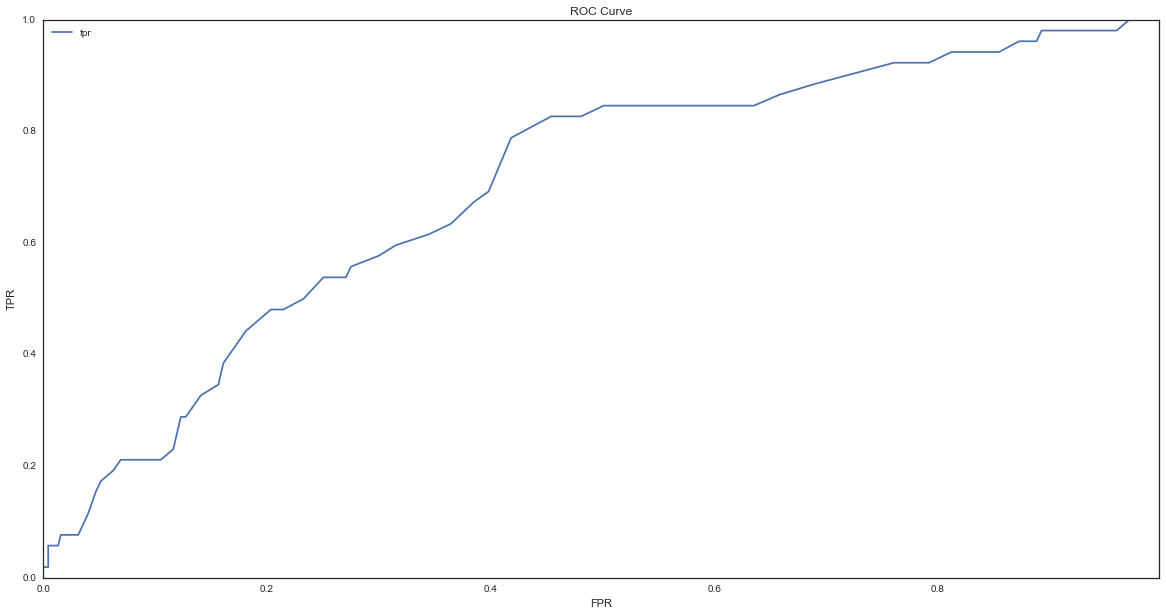

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)# Set size of plot
import seaborn as sns
sns.axes_style('white')
sns.set_style('white')
def roc(pr,cl):
    unique_pr = pr.unique()
    n = len(unique_pr)
    tp = np.zeros(n)
    fp = np.zeros(n)
    fn = np.zeros(n)
    tn = np.zeros(n)
    for i in range(n):
        test_vals = pr>unique_pr[i]
        if all(test_vals==False):
            tab = pd.DataFrame(np.array([[cl.value_counts()[0],cl.value_counts()[1]],[0,0]]))
        else:
            tab = pd.crosstab(test_vals,cl).astype('float')
        tp[i] = tab.ix[1,1]
        fp[i] = tab.ix[1,0]
        tn[i] = tab.ix[0,0]
        fn[i] = tab.ix[0,1]
    fpr_unsort = fp/(fp+tn)
    ind = fpr_unsort.argsort()
    fpr = fpr_unsort[ind]
    tpr_unsort = tp/(tp+fn)
    tpr = tpr_unsort[ind]
    return DataFrame({'fpr':fpr,'tpr':tpr})

# Run your function with, e.g.:
answer_ap = roc(eb.prob,eb.ebola)

answer_ap.plot(x='fpr',y='tpr')# suppress the matplotlib output
plt.xlabel('FPR')
plt.ylabel('TPR')
_ = plt.title('ROC Curve')
# 85%

# Assessment 9
Assessed exercises for week 8 -qq plots

It is often the case that we wish to decide which distribution is the best fit
to a single variable. For example, we might want to see whether the residuals
of a linear regression are approximately normally distributed. QQ-plots are 
one of the best ways to do this. They are often superior to drawing histograms
as it's easier to assess whether the tails of the distribution fit.

In this assessed exercise we're going to create some QQ-plots. The steps to create  a qqplot to compare a chosen probability distribution with a single variable x are:
1. Calculate the empirical cdf (ecdf) of x
2. Simulate a large number of observations from the chosen probability distribution
3. Find the quantiles of the distribution at the probabilities defined by the ecdf
If the two data sets match, a plot of the quantiles and the original data should 
fall on a straight line. For more detail, see e.g. http://onlinestatbook.com/2/advanced_graphs/q-q_plots.html

In this exercises we will use four data sets which come from four unknown probability distributions.
One of them comes from a N(0,1) distribution, another a t_5 distribution
another a Exp(1) distribution, and finally a Chi-squared(1) distribution.
The files are labelled qq1 to qq4.txt and are all of different lengths
We're going to use qq-plots to find which data set matches to which probability distribution

### Q1 Load in the four data sets and create histograms of each using the Pandas hist function
Given that two of these data sets are simulated from symmetrical distributions (the t and the normal),which two h are approximately symmetrical? 
(Hint: for later use convert these into series with, e.g. Series(qq1.ix[:,0])

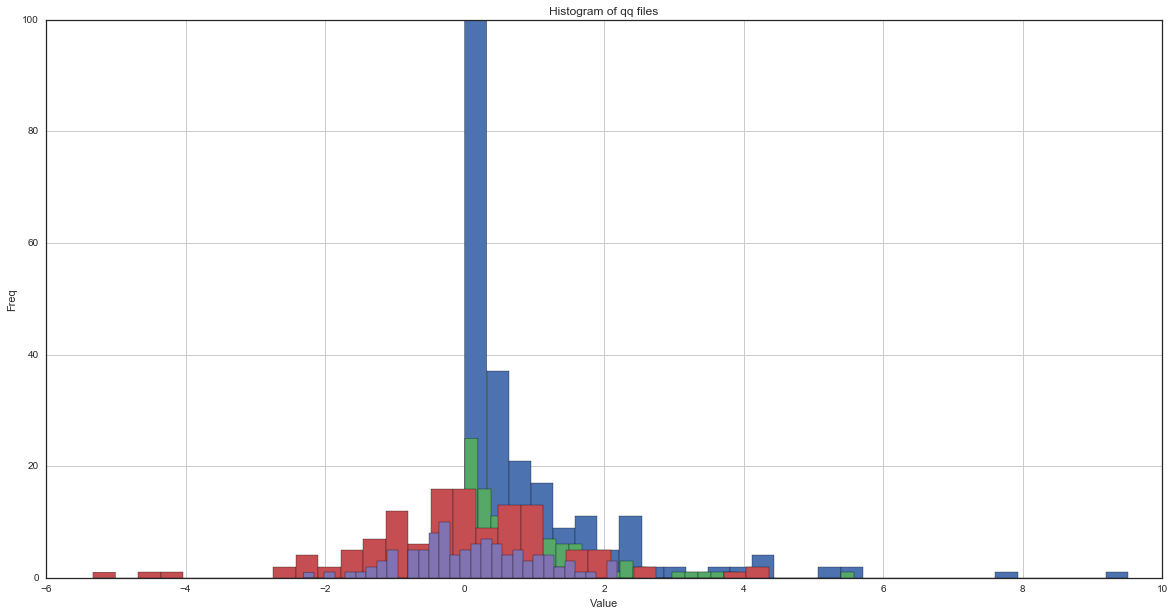

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Old version of question
# Q1 Load in the four data sets and create histograms of each using the Pandas hist function
# Which of the histograms are approximately symmetrical? 
# (Hint: for later use convert these into series with, e.g. Series(qq1.ix[:,0])
qq1 = Series(pd.read_csv(gl_path+'qq1.txt',header=None).ix[:,0])
qq2 = Series(pd.read_csv(gl_path+'qq2.txt',header=None).ix[:,0])
qq3 = Series(pd.read_csv(gl_path+'qq3.txt',header=None).ix[:,0])
qq4 = Series(pd.read_csv(gl_path+'qq4.txt',header=None).ix[:,0])

qq1.hist(bins=30) # Not symm
qq2.hist(bins=30) # Not symm
qq3.hist(bins=30) # symm
_ = qq4.hist(bins=30) # symm
plt.xlabel('Value')
plt.ylabel('Freq')
_ = plt.title('Histogram of qq files')

### Q2 For the first part of the task, we need to create the empirical cumulative distribution function (ecdf). 
This is defined as:
F-hat(z) = Number of z less than or equal to z_i / Number of observations

Write a function called ecdf which takes a set of observations and produces the empirical cdf

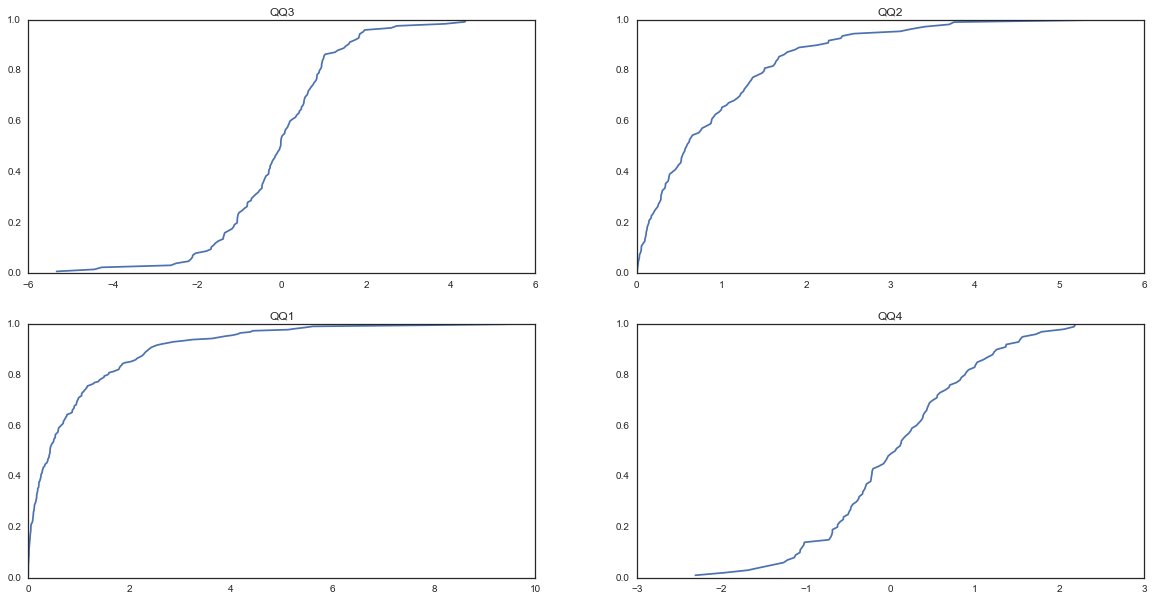

In [79]:
def ecdf(z):
    n = len(z)
    answer = np.zeros(n)
    for i in range(n):
        answer[i] = np.sum(z<=z[i])/float(n)
    return answer

# Plot qq1 vs its ecdf. Which of the following plots matches the ecdf of qq1?
plt.figure()
plt.subplot(2,2,1)
plt.plot(qq3,ecdf(qq3))
plt.title('QQ3')
plt.subplot(2,2,2)
plt.plot(qq2,ecdf(qq2))
plt.title('QQ2')
plt.subplot(2,2,3)
plt.plot(qq1,ecdf(qq1)) # This one - bottom left
plt.title('QQ1')
plt.subplot(2,2,4)
plt.plot(qq4,ecdf(qq4))
plt.title('QQ4')
plt.savefig(gl_path+'AEX8Q2.jpeg')

### Q3 For the next part we need to create the quantiles of a chosen probability distribution
Write a function which takes an ecdf created by your function in Q2and simulates 10,000 observations from a normal(0,1) distribution. Then calculate the quantiles of these simulations at the probabilities defined by the ecdf

/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


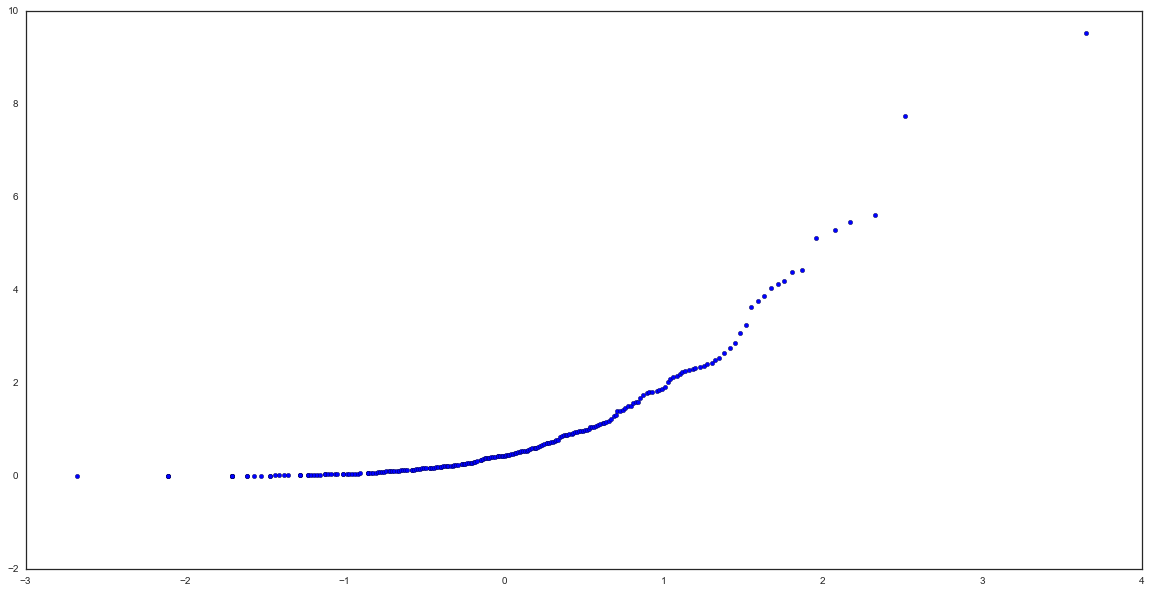

In [82]:
def normal_ecdf(ecdf):
    sim = Series(np.random.randn(1e4))
    return sim.quantile(ecdf)
qq1_ecdf = ecdf(qq1)
# Plot the theoretical quantiles from your new function (x-axis) against qq1 (y-axis). If the two distributions match, the points should
# lie on a straight line - this is a QQ-plot. Do you think qq1 is the normally distributed variable?
th_ecdf = normal_ecdf(qq1_ecdf)
plt.figure()
_ = plt.scatter(th_ecdf,qq1) # No!

### Q4 Combine your two functions into one called qq_norm which takes a Series and creates a QQ-plot of the original data against the quantiles of a standard normal distribution

/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,empirical,theoretical
0,-2.309,-2.337138
1,-1.967,-2.018735
2,-1.687,-1.839471
3,-1.549,-1.726847
4,-1.265,-1.549006
5,-1.265,-1.549006
6,-1.221,-1.460561
7,-1.138,-1.386670
8,-1.123,-1.319971
9,-1.072,-1.256802


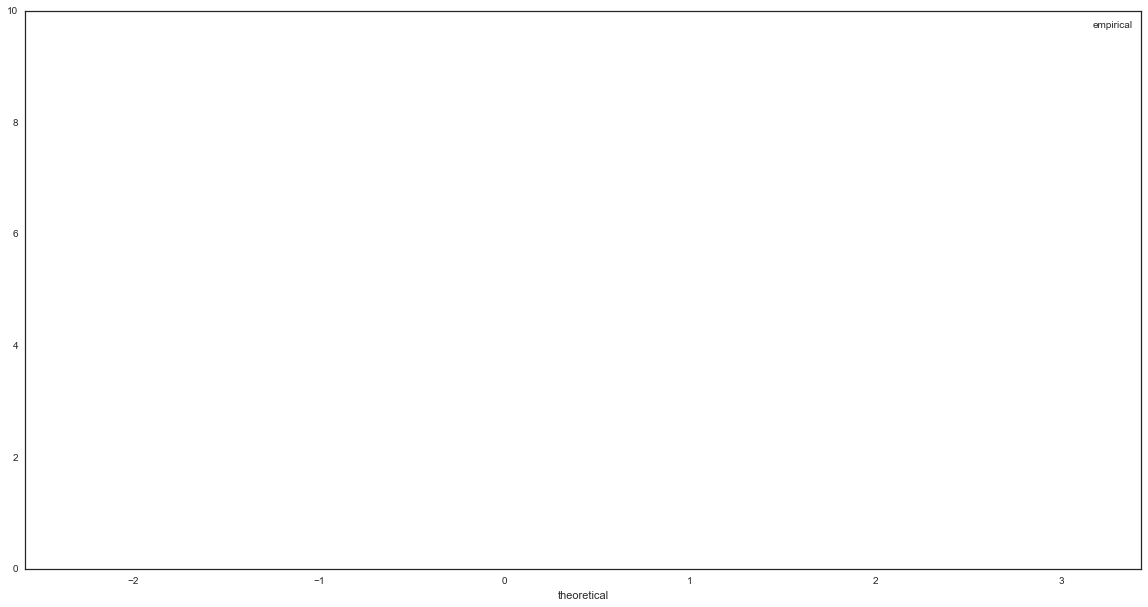

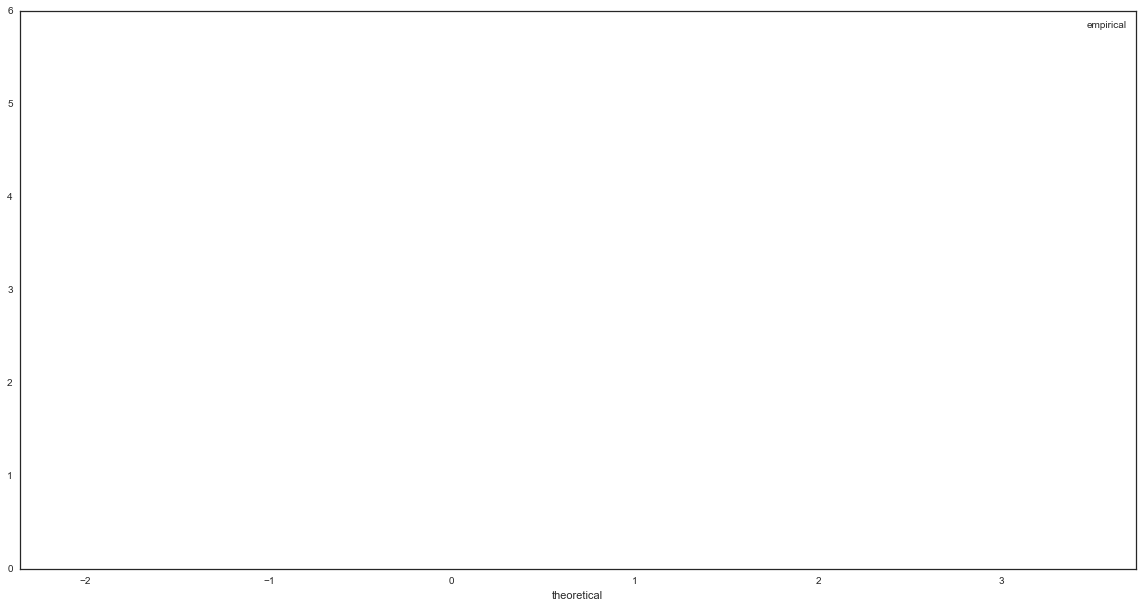

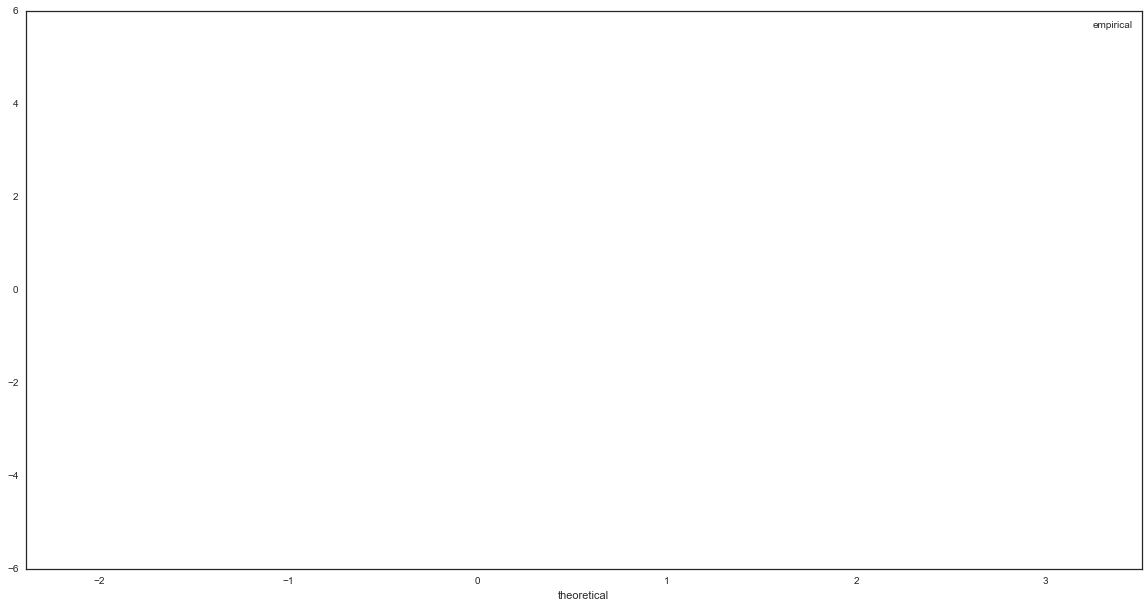

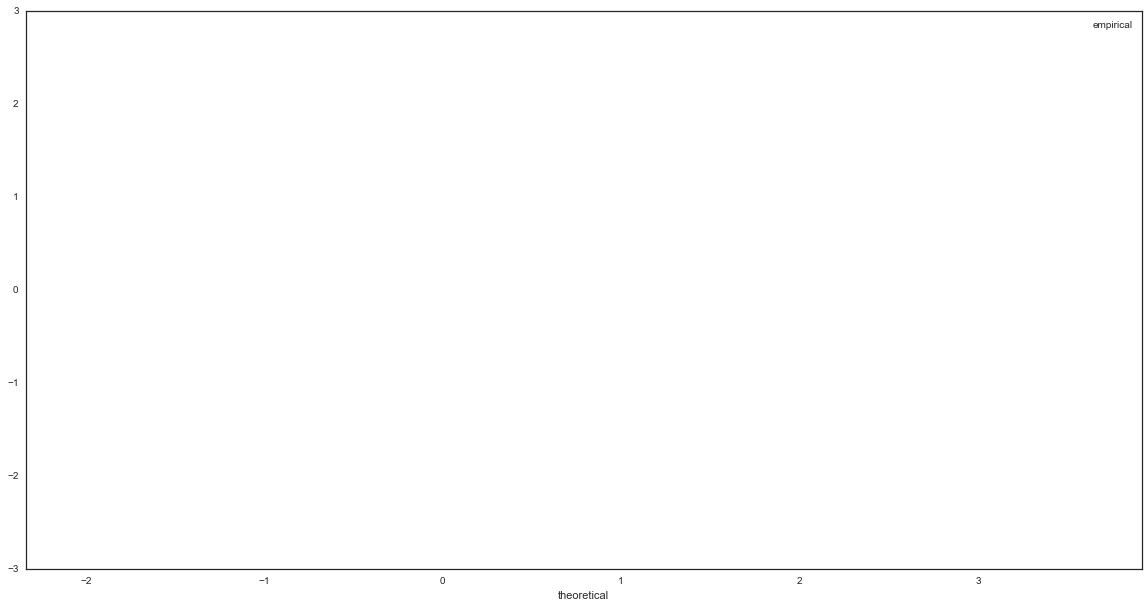

In [83]:
def qq_norm(y):
    n = len(y)
    ecdf = np.zeros(n)
    for i in range(n):
        ecdf[i] = np.sum(y<=y[i])/float(n)
    sim = Series(np.random.randn(1e4))
    th_q = sim.quantile(ecdf)
    out = DataFrame({'theoretical':th_q.values,'empirical':y})
    out.plot('theoretical','empirical',style='kx')
    return out
# Which of the four data sets looks most like a normal distribution? (i.e. has a qq plot closest to the straight line)
plt.figure()
qq_norm(qq1)
plt.figure()
qq_norm(qq2)
plt.figure()
qq_norm(qq3)
plt.figure()
qq_norm(qq4) # This one

### Q5 Extend your function of question 4 to create a new function qq_plot that takes two arguments.
The first argument should be your data Series as before but the second argument should be a set of simulations from some probability distribution. It should use these samples to calculate the theoretical quantiles. 

/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

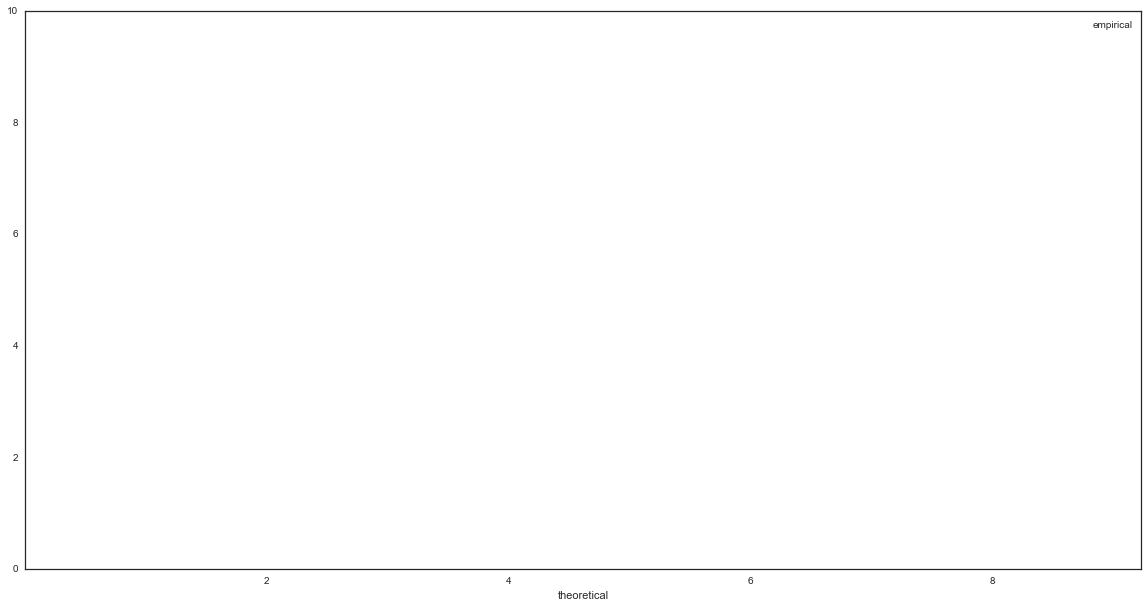

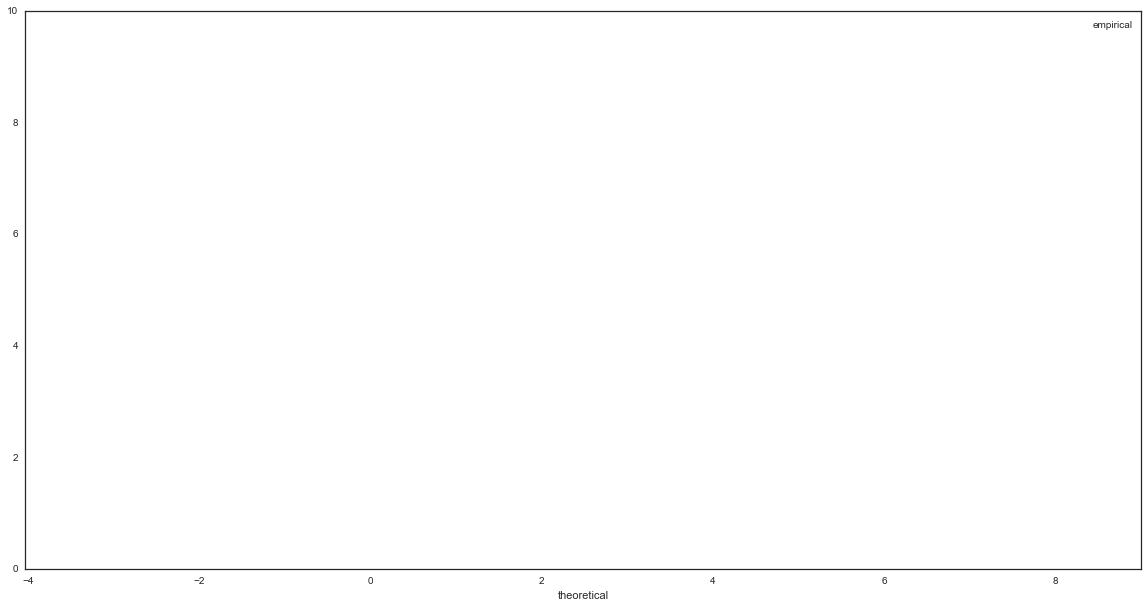

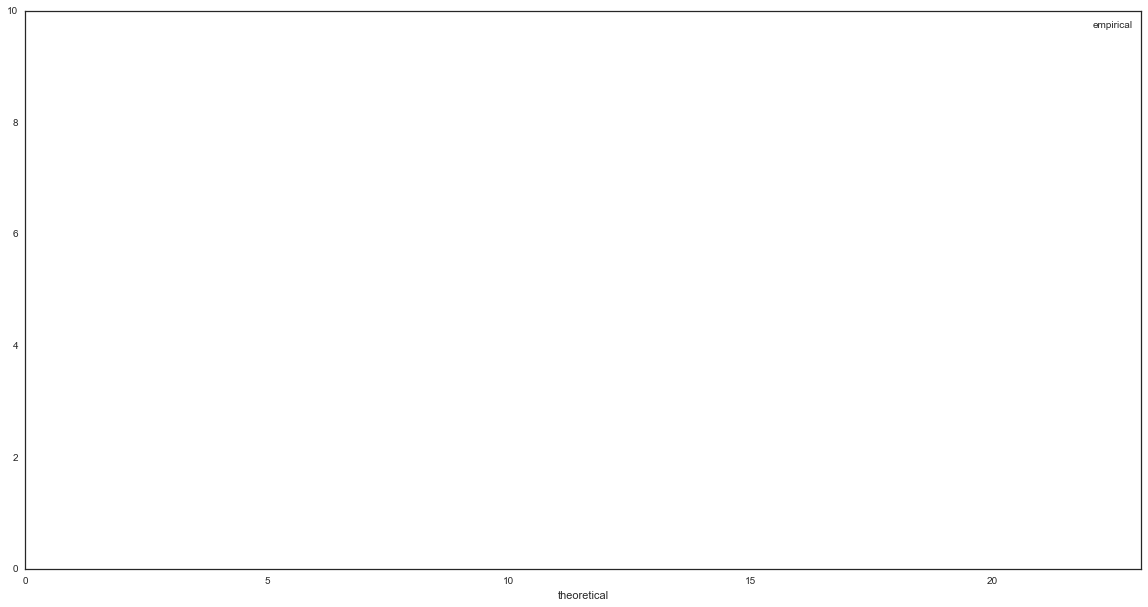

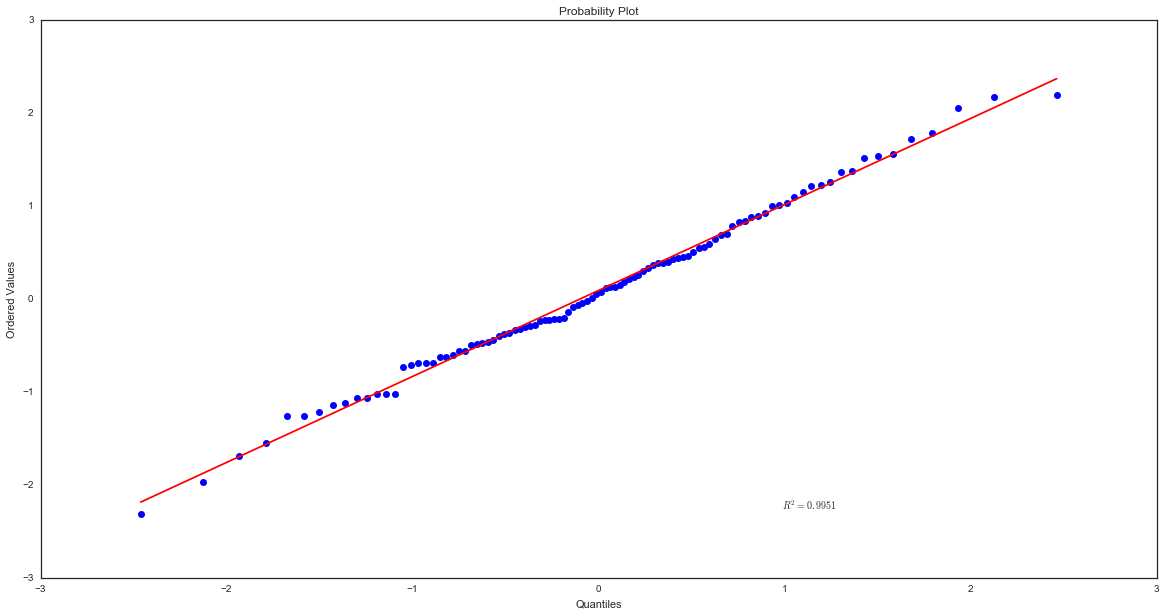

In [84]:
def qq_plot(y,z):
    n = len(y)
    ecdf = np.zeros(n)
    for i in range(n):
        ecdf[i] = np.sum(y<=y[i])/float(n)
    th_q = z.quantile(ecdf)
    out = DataFrame({'theoretical':th_q.values,'empirical':y})
    out.plot('theoretical','empirical',style='kx')
    return out

# Run your function with e.g. 
import numpy.random as npr
qq_plot(qq1,Series(npr.exponential(1,1e4)))
qq_plot(qq1,Series(npr.standard_t(5,1e4)))
qq_plot(qq1,Series(npr.chisquare(1,1e4)))
# By looking at your qq-plots, decide which distribution matches with which data set
# qq1 = chi-square(1)
# qq2 = exp(1)
# qq3 = t_5
# qq4 = normal(0,1)

################################################################################

# Check
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(qq4, dist='norm',plot=ax)